           Count
     Name       
1900 Ruth   4781
1901 Ruth   3989
1902 Ruth   4401
1903 Ruth   4531
1904 Ruth   4915
   Year  Ruth count
0  1900        4781
1  1901        3989
2  1902        4401
3  1903        4531
4  1904        4915
             Count
     Name         
1900 Robert   3845
1901 Robert   2559
1902 Robert   3201
1903 Robert   3057
1904 Robert   3427
   Year  Robert count
0  1900          3845
1  1901          2559
2  1902          3201
3  1903          3057
4  1904          3427


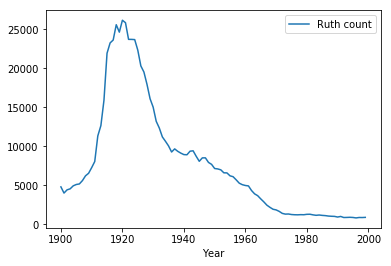

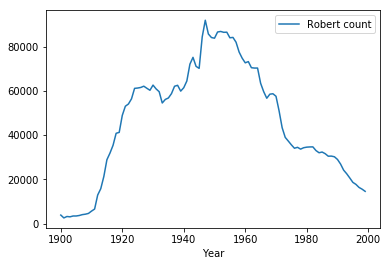

In [71]:
#1 Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
#делаем через функцию, кот орая сама всё делает по заданным параметрам
def concat_names(target_years, name):
    import pandas as pd
    import matplotlib.pyplot as plt
    DATA_PATH = "D:DataS\YOB"
    names_dict = {}
#циклом пробегаем по нужным нам годам, загружаем данные, обрезаем только нужнoе нам имя
    for target_year in range (target_years[0], target_years[1]):
        all_names = pd.read_csv(f"{DATA_PATH}\yob{target_year}.txt", names = ["Name", "Gender", "Count"])
        names = all_names[(all_names.Name == str(name))]
#дополнительные телодвижения, чтобы учесть мужчин-Рут и женщин-Роберт
        names = names.groupby("Name").sum()
#подгружаем данные в словарь по ключу "Год"
        names_dict[target_year] =  names
#склеиваем данные)
    names = pd.concat(names_dict)
    print(names.head())
#причесываем дата-фрейм
    names = names.reset_index()
    names = names.drop(names.columns[1], axis=1)
    names = names.rename(columns={'level_0': 'Year', 'Count': '{} count'.format(name)})
    print(names.head())
    names.plot(x="Year")
    return
concat_names([1900, 2000], "Ruth")
concat_names([1900, 2000], "Robert")





        Name  Count
1900 0  Ruth   4781
1905 0  Ruth   5088
1910 0  Ruth   7247
1915 0  Ruth  21924
1920 0  Ruth  26155
   Year  Ruth count
0  1900        4781
1  1905        5088
2  1910        7247
3  1915       21924
4  1920       26155
          Name  Count
1900 0  Robert   3845
1905 0  Robert   3431
1910 0  Robert   5638
1915 0  Robert  28854
1920 0  Robert  48883
   Year  Robert count
0  1900          3845
1  1905          3431
2  1910          5638
3  1915         28854
4  1920         48883


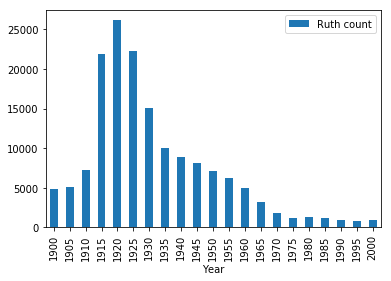

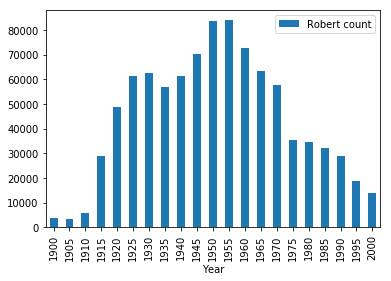

In [50]:
#2 Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
#сделал тоже через функцию, теперь она просто возвращает данные

import pandas as pd
import matplotlib.pyplot as plt
DATA_PATH = "D:DataS\YOB"

def get_data_by_name(start_year, finish_year, Name):
    names_dict = {}
    for year in range (start_year, finish_year+1, 5):
        all_names = pd.read_csv(f"{DATA_PATH}\yob{year}.txt", names = ["Name", "Gender", "Count"])
        names = all_names[(all_names.Name == str(Name))]
        names = names.groupby("Name").sum()
        names = names.reset_index()
        names_dict[year] =  names
    names = pd.concat(names_dict)
    print(names.head())
# После долгой и упорной борьбы датафрейм переведён в человекообразный вид!
    names = names.reset_index()
    names = names.drop(names.columns[[1,2]], axis=1)
#моя гордость - название столбца зависит от переданного в функцию имени
    names = names.rename(columns={'level_0': 'Year', 'Count': '{} count'.format(Name)})
    print(names.head())
    return names

data = get_data_by_name(1900, 2000, "Ruth")
data.plot.bar(x='Year')
data = get_data_by_name(1900, 2000, "Robert")
data.plot.bar(x='Year')

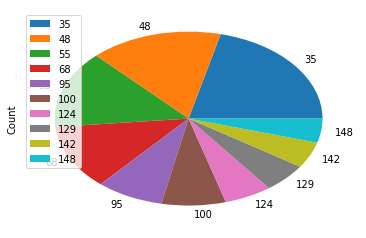

In [13]:
#3 Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
names_1950 = pd.read_csv(f"{DATA_PATH}\yob1950.txt", names = ["Name", "Gender", "Count"])
names_1950[(names_1950.Name.str.startswith("R"))].head(10).plot.pie(y="Count")
#тут криво, но вроде бы правильно

              Name Gender  Count
1900 0        Mary      F  16706
     1       Helen      F   6343
     2        Anna      F   6114
     3    Margaret      F   5304
     4        Ruth      F   4765
     5   Elizabeth      F   4096
     6    Florence      F   3920
     7       Ethel      F   3896
     8       Marie      F   3856
     9     Lillian      F   3414
     10      Annie      F   3324
     11       Edna      F   3102
          Count
Name           
Aadam        58
Aadarsh       5
Aadil        80
Aaditya      30
Aage          7
Aagot         5
Aahil         6
Aailiyah      5
Aailyah      36
Aaisha       83
Aajah         6
Aakash      398
           Count
Name            
James    4810303
John     4739978
Robert   4638964
Michael  4023311
Mary     3853769
      Name    Count
0    James  4810303
1     John  4739978
2   Robert  4638964
3  Michael  4023311
4     Mary  3853769
      Name    Count  Cons
0    James  4810303     3
1     John  4739978     3
2   Robert  4638964     4
3  M

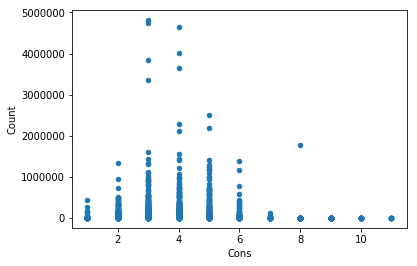

In [51]:
#4 Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".
import pandas as pd
DATA_PATH = "D:DataS\YOB"

def count_cons(row):
    return len([c for c in row.Name if c not in 'aeiou'])

names_dict = {}
#снова циклом пробегаем по всем годам, загружаем данные, обрезаем только нужные нам два имени
for year in range (1900, 2001):
    all_names = pd.read_csv(f"{DATA_PATH}\yob{year}.txt", names = ["Name", "Gender", "Count"])
    names_dict[year] =  all_names
#в прицнипе всё аналогично, просто данных намного больше, и каждый шаг приходится принтом проверять, что именно получается
names = pd.concat(names_dict)

print(names.head(12))

names = names.groupby("Name").sum()

print(names.head(12))

names = names.sort_values(by=["Count"], ascending=False)

print(names.head(5))

names = names.reset_index()

print(names.head(5))

names["Cons"] = names.apply(count_cons, axis=1)
print(names.head(5))
print(names.sort_values(by=["Cons"], ascending=False).head(5))
print(names.sort_values(by=["Cons"], ascending=True).head(5))
#а вот этим графиком я доволен. ОН не кривой и более менее информативный. Сразу видна "аномалия" - разные варианты Кристофер с его 11 согласными буквам и короткие азиатские имена, а также Зоя.
names.plot.scatter(x="Cons", y="Count")

